# Exploratory Analysis and Churn Rate Analysis of Customer Subscription Dataset

## Project Outline

1. [Introduction](https://github.com/OluwanifemiAjayi/Churn_Rate_Analysis/edit/main/README.md#1-introduction)

2. [Data and Libraries Importing](https://github.com/OluwanifemiAjayi/Churn_Rate_Analysis/edit/main/README.md#2-data-and-libraries-importing)

3. [Data Assessment and Cleaning](https://github.com/OluwanifemiAjayi/Churn_Rate_Analysis/edit/main/README.md#3-data-assessment-and-cleaning)

4. [Data Exploration and Visualization](https://github.com/OluwanifemiAjayi/Churn_Rate_Analysis/edit/main/README.md#4-data-exploration-and-visualization)

5. [Churn Rate Analysis](https://github.com/OluwanifemiAjayi/Churn_Rate_Analysis/edit/main/README.md#5-churn-rate-analysis)

6. [Conclusion](https://github.com/OluwanifemiAjayi/Churn_Rate_Analysis/edit/main/README.md#6-conclusion)

## 1. Introduction

I did an analysis on a dataset with details on customer subscription and transaction, the aim of this project was to explore and identify trends in this dataset and also analyze the churn rate and how it changes due to different factors. I was able to conduct this analysis while making use of multiple python libraries like Pandas to manipulate data, NumPy to perform numerical operations, MatPlotlib to plot data and Seaborn to plot advanced charts. 

## 2. Data and Libraries Importing

I started out by importing all libraries necessary for this analysis and loading my dataset into a Pandas DataFrame to analyze

In [1]:
import pandas as pd  # Import pandas for data manipulation
import numpy as np  # Import numpy for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for enhanced plotting
import warnings  # Import warnings module to manage warning messages

# Ignore all warnings
warnings.simplefilter(action='ignore')

In [2]:
# Load the dataset into a DataFrame
df = pd.read_csv("Customer_Subscription_And_Transaction_Details.csv")

## 3. Data Assessment and Cleaning

I inspected my DataFrame to check the count of rows and columns, the datatypes for each columns and also for the existence of blank rows. Then I started cleaning the data by converting the date column in the DataFrame to datetime, transforming the text-based columns into categorical data and lastly, I changed the rows of the Transaction_type column from both cases used to all lowercase so as to maintain data consistency.

In [3]:
df.head(10) # Display the first 10 rows of the DataFrame

,cust_id,transaction_type,transaction_date,subscription_type,subscription_price,customer_gender,age_group,customer_country,referral_type
0,1,initial,2020-09-01,BASIC,33,Male,35-44,Denmark,Google Ads
1,2,initial,2022-03-01,BASIC,53,Female,18-24,Denmark,facebook
2,3,initial,2020-10-01,MAX,99,Female,25-34,Norway,facebook
3,3,REDUCTION,2022-02-01,BASIC,53,Female,25-34,Norway,facebook
4,4,initial,2022-05-01,PRO,85,Male,18-24,Sweden,Display
5,5,initial,2022-08-01,BASIC,53,Male,35-44,Sweden,Google Ads
6,6,initial,2022-06-01,MAX,119,Male,55-65,Sweden,facebook
7,7,initial,2022-02-01,MAX,119,Female,25-34,Sweden,facebook
8,8,initial,2021-01-01,BASIC,43,Other,45-54,Sweden,facebook
9,8,CHURN,2021-04-01,BASIC,43,Other,45-54,Sweden,facebook


In [4]:
df.shape # Show the dimensions (rows, columns) of the DataFrame

(18106, 9)

In [5]:
df.info() # Display a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18106 entries, 0 to 18105
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cust_id             18106 non-null  int64 
 1   transaction_type    18106 non-null  object
 2   transaction_date    18106 non-null  object
 3   subscription_type   18106 non-null  object
 4   subscription_price  18106 non-null  int64 
 5   customer_gender     18106 non-null  object
 6   age_group           18106 non-null  object
 7   customer_country    18106 non-null  object
 8   referral_type       18106 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


In [6]:
df.describe() # Show descriptive statistics for numerical columns in the DataFrame

,cust_id,subscription_price
count,18106.000000,18106.000000
mean,5176.468298,73.340771
std,2988.697910,27.902649
min,1.000000,33.000000
25%,2590.250000,53.000000
50%,5157.500000,75.000000
75%,7767.000000,99.000000
max,10366.000000,119.000000


In [7]:
# Convert the 'transaction_date' column to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [8]:
# Define the list of categorical columns
categories = ['subscription_type', 'customer_gender', 'age_group', 'customer_country', 'referral_type']

# Convert specified columns to 'category' dtype
for column in categories:
    df[column] = df[column].astype('category')

# Print the data types of all columns in the DataFrame
print(df.dtypes)

cust_id                        int64
transaction_type              object
transaction_date      datetime64[ns]
subscription_type           category
subscription_price             int64
customer_gender             category
age_group                   category
customer_country            category
referral_type               category
dtype: object


In [9]:
# Convert the 'transaction_type' column to lowercase
df['transaction_type']= df['transaction_type'].str.lower()
# Display the 'transaction_type' column to verify changes
df['transaction_type']

0          initial
1          initial
2          initial
3        reduction
4          initial
           ...    
18101      upgrade
18102      initial
18103    reduction
18104      initial
18105        churn
Name: transaction_type, Length: 18106, dtype: object

## 4. Data Exploration and Visualization

I proceeded to explore the data to derive the insights from this data while visualizing them to show these insights gotten. I started out by determining the subscription preference of the customers, how the prices for these subscriptions have changed over the years. Then I moved to explore the data based on customer demographics checking the different age_groups, which subscription type is preferred by which gender, countries with the most customers. 

Next, I analyzed referral effectiveness, pricing strategy, transaction_types; their count and how long it takes an average customer to change subscription. I analyzed customer behaviour; such as how many customers changed their subscriptions, and geographic insights like average subscription prices in each countries.

In [10]:
# Count the occurrences of each subscription type
df['subscription_type'].value_counts()

subscription_type
BASIC    7022
PRO      6276
MAX      4808
Name: count, dtype: int64

In [11]:
# Extract the year from 'transaction_date' and create a new 'year' column
df['year'] = df['transaction_date'].apply(lambda x: x.year)
# Display the first few rows of the DataFrame to verify changes
df.head()

,cust_id,transaction_type,transaction_date,subscription_type,subscription_price,customer_gender,age_group,customer_country,referral_type,year
0,1,initial,2020-09-01,BASIC,33,Male,35-44,Denmark,Google Ads,2020
1,2,initial,2022-03-01,BASIC,53,Female,18-24,Denmark,facebook,2022
2,3,initial,2020-10-01,MAX,99,Female,25-34,Norway,facebook,2020
3,3,reduction,2022-02-01,BASIC,53,Female,25-34,Norway,facebook,2022
4,4,initial,2022-05-01,PRO,85,Male,18-24,Sweden,Display,2022


In [12]:
# Calculate the mean subscription price per year and subscription type
sub_type_price_change_yearly = df.groupby(['year', 'subscription_type'])['subscription_price'].mean().reset_index()
# Print the DataFrame showing yearly price changes by subscription type
print(sub_type_price_change_yearly)

   year subscription_type  subscription_price
0  2020             BASIC                33.0
1  2020               MAX                99.0
2  2020               PRO                65.0
3  2021             BASIC                43.0
4  2021               MAX               109.0
5  2021               PRO                75.0
6  2022             BASIC                53.0
7  2022               MAX               119.0
8  2022               PRO                85.0


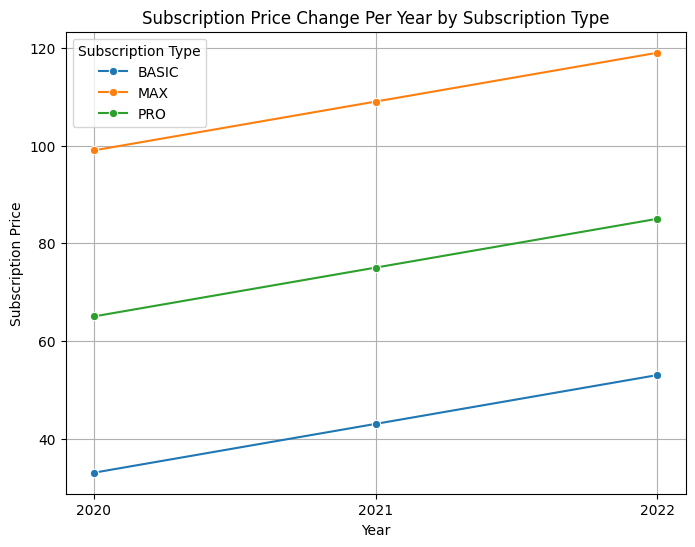

In [13]:
# Plot subscription price change per year by subscription type
plt.figure(figsize=(8, 6))
sns.lineplot(data=sub_type_price_change_yearly, x='year', y='subscription_price', hue='subscription_type', marker='o')

plt.title('Subscription Price Change Per Year by Subscription Type')
plt.xlabel('Year')
plt.ylabel('Subscription Price')
plt.legend(title='Subscription Type')
plt.xticks(sub_type_price_change_yearly['year'].unique()) 
plt.grid(True)
plt.savefig('subscription_yearly_price_change.png')  # Save the figure

plt.show()

In [14]:
df['age_group'].value_counts() # Count the occurrences of each age group

age_group
18-24    4401
25-34    3728
45-54    3374
35-44    3302
55-65    3301
Name: count, dtype: int64

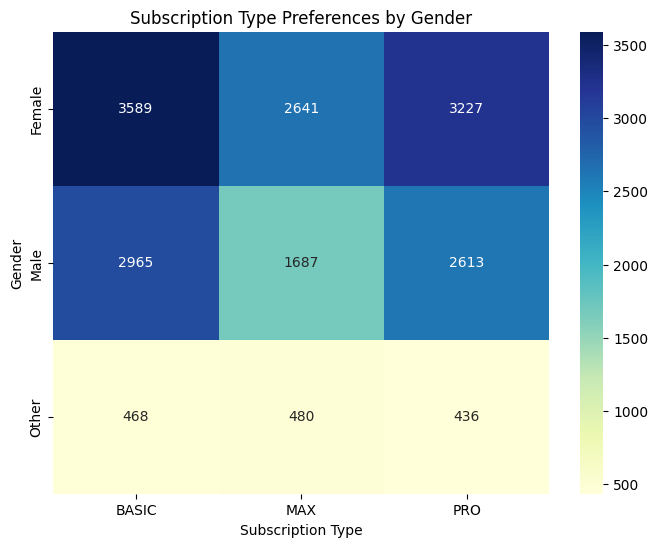

In [15]:
# Count the number of each subscription type by gender
gender_subscription_counts = df.groupby(['customer_gender', 'subscription_type']).size().reset_index(name='count')

# Pivot the table for better visualization
pivot_table = gender_subscription_counts.pivot(index='customer_gender', columns='subscription_type', values='count')

# Plot a heatmap showing subscription type preferences by gender
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Subscription Type Preferences by Gender')
plt.xlabel('Subscription Type')
plt.ylabel('Gender')
plt.savefig('gender_subscription_type.png')  # Save the figure

In [16]:
# Count the occurrences of each country and display the most common one
country = df['customer_country'].value_counts()
print(country.head(1))

customer_country
Sweden    7009
Name: count, dtype: int64


In [17]:
# Count the occurrences of each referral type and display the most common one
ref = df['referral_type'].value_counts()
print(ref.head(1))

referral_type
Google Ads    5884
Name: count, dtype: int64


In [18]:
# Calculate the mean subscription price for each subscription type
df.groupby('subscription_type')['subscription_price'].mean().reset_index()

,subscription_type,subscription_price
0,BASIC,44.580746
1,MAX,111.843178
2,PRO,76.022945


In [19]:
# Count the occurrences of each transaction type
df['transaction_type'].value_counts()

transaction_type
initial      10366
upgrade       3006
reduction     2539
churn         2195
Name: count, dtype: int64

In [20]:
# Sort the DataFrame by customer ID and transaction date
df_sorted = df.sort_values(by=['cust_id', 'transaction_date'])

# Ensure the 'transaction_date' column is in datetime format
df_sorted['transaction_date'] = pd.to_datetime(df_sorted['transaction_date'])

# Create a new column for the next subscription type for each customer
df_sorted['next_subscription_type'] = df_sorted.groupby('cust_id')['subscription_type'].shift(-1)

# Calculate the duration between current and next transaction date for each customer
df_sorted['duration'] = (df_sorted.groupby('cust_id')['transaction_date'].shift(-1) - df_sorted['transaction_date']).dt.days

# Calculate the average duration before changing subscription and print results
average_duration = df_sorted['duration'].mean()

print(f"Average duration before changing subscription: {average_duration:.2f} days")

Average duration before changing subscription: 289.63 days


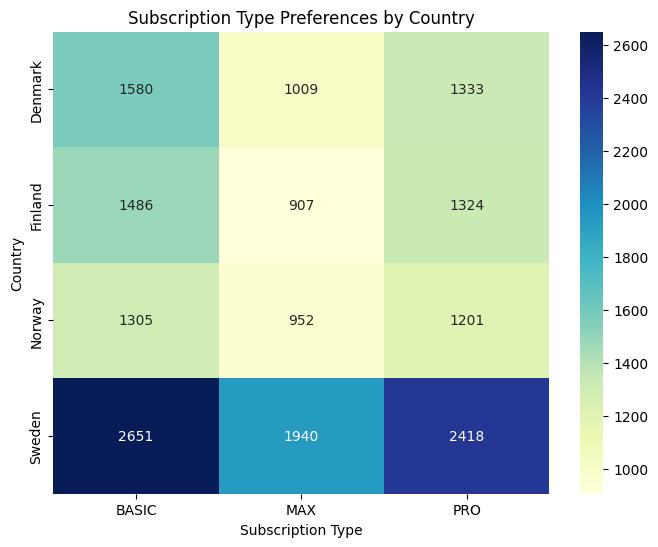

In [22]:
# Count the number of each subscription type by country
country_subscription_counts = df.groupby(['customer_country', 'subscription_type']).size().reset_index(name='count')

# Pivot the table for better visualization
pivot_table = country_subscription_counts.pivot(index='customer_country', columns='subscription_type', values='count')

# Plot a heatmap showing subscription type preferences by country
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Subscription Type Preferences by Country')
plt.xlabel('Subscription Type')
plt.ylabel('Country')
plt.savefig('country_subscription_type.png')  # Save the figure
plt.show()

## 5. Churn Rate Analysis

I created an active_or_churned column to show whether a customer has churned or is still an active customer, then I created a churn column and DataFrame for the sake of my visualizations. Then I was able to calculate the churn rate and analyze the rate at which customers churn by different factors like gender, age_group, country, subscription_type, referral_type, year, and month and I visualized the results.

In [23]:
#Define function to determine customer status based on transaction type
def status(transaction_type):
        if transaction_type == 'churn':
            return 'churned'
        else:
            return 'active'
            
# Apply the status function to create a new column 'active_or_churned'
df['active_or_churned']= df['transaction_type'].apply(status)
print(df.head())

   cust_id transaction_type transaction_date subscription_type  \
0        1          initial       2020-09-01             BASIC   
1        2          initial       2022-03-01             BASIC   
2        3          initial       2020-10-01               MAX   
3        3        reduction       2022-02-01             BASIC   
4        4          initial       2022-05-01               PRO   

   subscription_price customer_gender age_group customer_country  \
0                  33            Male     35-44          Denmark   
1                  53          Female     18-24          Denmark   
2                  99          Female     25-34           Norway   
3                  53          Female     25-34           Norway   
4                  85            Male     18-24           Sweden   

  referral_type  year active_or_churned  
0    Google Ads  2020            active  
1      facebook  2022            active  
2      facebook  2020            active  
3      facebook  2022     

In [24]:
# Function to indicate churn with a binary value
def churned(transaction_type):
        if transaction_type == 'churn':
            return 1
        else:
            return 0

# Apply the status function to create a new column 'churn'
df['churn']= df['transaction_type'].apply(churned)
print(df)

       cust_id transaction_type transaction_date subscription_type  \
0            1          initial       2020-09-01             BASIC   
1            2          initial       2022-03-01             BASIC   
2            3          initial       2020-10-01               MAX   
3            3        reduction       2022-02-01             BASIC   
4            4          initial       2022-05-01               PRO   
...        ...              ...              ...               ...   
18101    10364          upgrade       2022-09-01               MAX   
18102    10365          initial       2021-05-01               PRO   
18103    10365        reduction       2021-07-01             BASIC   
18104    10366          initial       2021-01-01             BASIC   
18105    10366            churn       2022-02-01             BASIC   

       subscription_price customer_gender age_group customer_country  \
0                      33            Male     35-44          Denmark   
1              

In [25]:
# Convert the 'churn' column to numeric type
df['churn'] = pd.to_numeric(df['churn'])

In [26]:
# Calculate the total number of unique customers
total_customers = len(df['cust_id'].unique())
total_customers

10366

In [27]:
# Calculate the total number of unique churned customers
churned_customers = df[df['churn'] == 1]['cust_id'].nunique()
print(churned_customers)

2052


In [28]:
# Calculate the churn rate
churn_rate = (churned_customers/total_customers) * 100
print(f'Churn rate: {churn_rate}%')

Churn rate: 19.795485240208375%


In [29]:
# Create a DataFrame of only churned customers
churn_df = df[df['churn']== 1]
churn_df.head(5)

,cust_id,transaction_type,transaction_date,subscription_type,subscription_price,customer_gender,age_group,customer_country,referral_type,year,active_or_churned,churn
9,8,churn,2021-04-01,BASIC,43,Other,45-54,Sweden,facebook,2021,churned,1
11,9,churn,2021-03-01,BASIC,43,Female,25-34,Sweden,facebook,2021,churned,1
24,17,churn,2022-08-01,BASIC,53,Male,45-54,Denmark,Unknown,2022,churned,1
32,22,churn,2022-11-01,BASIC,53,Female,25-34,Finland,Unknown,2022,churned,1
41,26,churn,2022-10-01,PRO,85,Female,35-44,Sweden,Paid Search,2022,churned,1


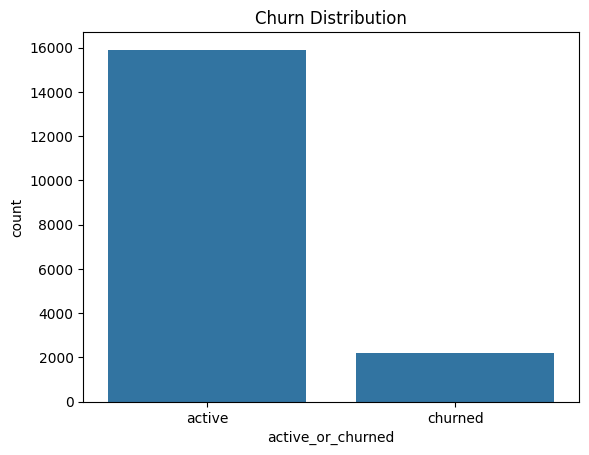

In [31]:
# Plot the distribution of churned vs. active customers
sns.countplot(x='active_or_churned', data=df)
plt.title('Churn Distribution')
plt.savefig('churn_distribution.png')  # Save the figure
plt.show()

In [32]:
# Calculate churn count by country
country_churn = churn_df.groupby('customer_country').size()

# Calculate total churn count across all countries
total_country_churn = country_churn.sum()

# Calculate churn rate by country
churn_rate_by_country = (country_churn / total_country_churn) * 100
print('Churn rate by country:')
print(f'{churn_rate_by_country}')

Churn rate by country:
customer_country
Denmark    31.617312
Finland    35.216401
Norway      7.334852
Sweden     25.831435
dtype: float64


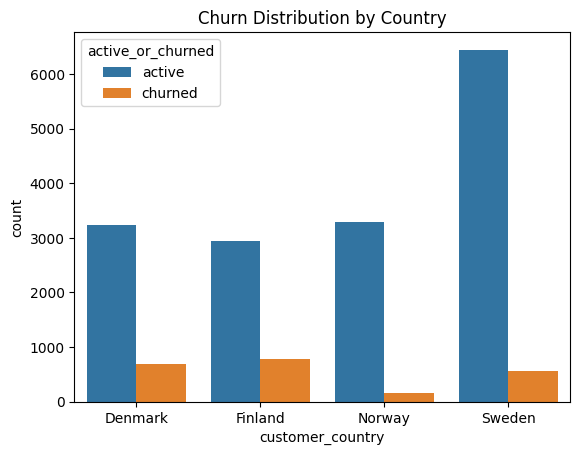

In [33]:
# Plot churn distribution by country
sns.countplot(x='customer_country', hue='active_or_churned', data=df)
plt.title('Churn Distribution by Country')
plt.savefig('churn_by_country.png')  # Save the figure
plt.show()

In [34]:
# Calculate churn count by gender
gender_churn= churn_df.groupby('customer_gender').size()

# Calculate total churn count across all genders
total_gender_churn= gender_churn.sum()

# Calculate churn rate by gender
churn_rate_by_gender= (gender_churn/total_gender_churn) * 100
print('Churn rate by gender:')
print(f'{churn_rate_by_gender}')

Churn rate by gender:
customer_gender
Female    50.706150
Male      42.687927
Other      6.605923
dtype: float64


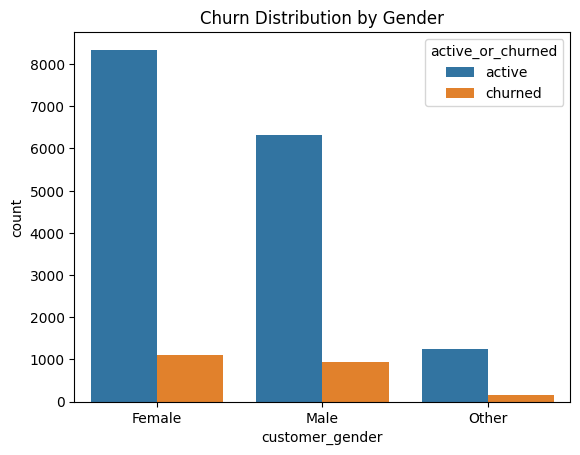

In [35]:
# Plot churn distribution by gender
sns.countplot(x='customer_gender', hue='active_or_churned', data=df)
plt.title('Churn Distribution by Gender')
plt.savefig('churn_by_gender.png')  # Save the figure
plt.show()

In [36]:
# Calculate churn count by age group
age_group_churn = churn_df.groupby('age_group').size()

# Calculate total churn count across all age groups
total_age_group_churn = age_group_churn.sum()

# Calculate churn rate by age group
churn_rate_by_age_group = (age_group_churn / total_age_group_churn) * 100
print('Churn rate by age group:')
print(f'{churn_rate_by_age_group}')

Churn rate by age group:
age_group
18-24    25.375854
25-34    21.047836
35-44    18.815490
45-54    16.810934
55-65    17.949886
dtype: float64


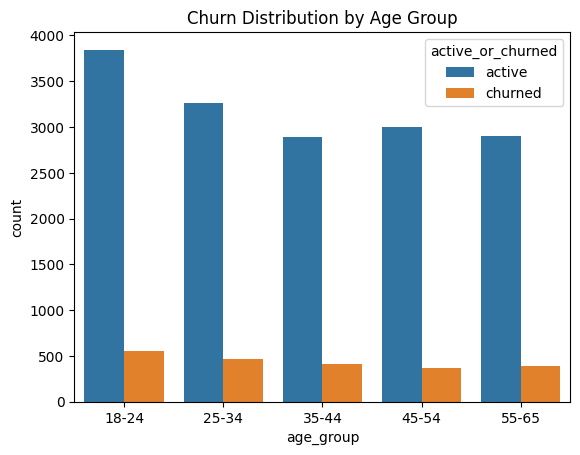

In [37]:
# Plot churn distribution by age group
sns.countplot(x='age_group', hue='active_or_churned', data=df)
plt.title('Churn Distribution by Age Group')
plt.savefig('churn_by_age_group.png')  # Save the figure
plt.show()

In [38]:
# Calculate churn count by year
year_churn = churn_df.groupby('year').size()

# Calculate total churn count across all years
total_year_churn = year_churn.sum()

# Calculate churn rate by year
churn_rate_by_year = (year_churn / total_year_churn) * 100
print('Churn rate by year:')
print(f'{churn_rate_by_year}')

Churn rate by year:
year
2020    14.077449
2021    41.230068
2022    44.692483
dtype: float64


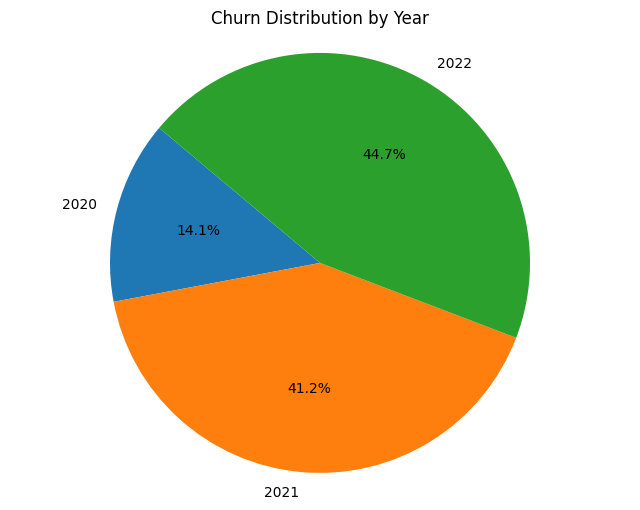

In [39]:
# Plot churn distribution by year using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(year_churn, labels=year_churn.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution by Year')
plt.axis('equal') 
plt.savefig('churn_by_year.png')  # Save the figure
plt.show()

In [40]:
# Calculate churn count by subscription type
subscription_churn = churn_df.groupby('subscription_type').size()

# Calculate total churn count across all subscription types
total_sub_churn = subscription_churn.sum()

# Calculate churn rate by subscription type
churn_rate_by_sub = (subscription_churn / total_sub_churn) * 100
print('Churn rate by subscription:')
print(f'{churn_rate_by_sub}')

Churn rate by subscription:
subscription_type
BASIC    45.011390
MAX      19.589977
PRO      35.398633
dtype: float64


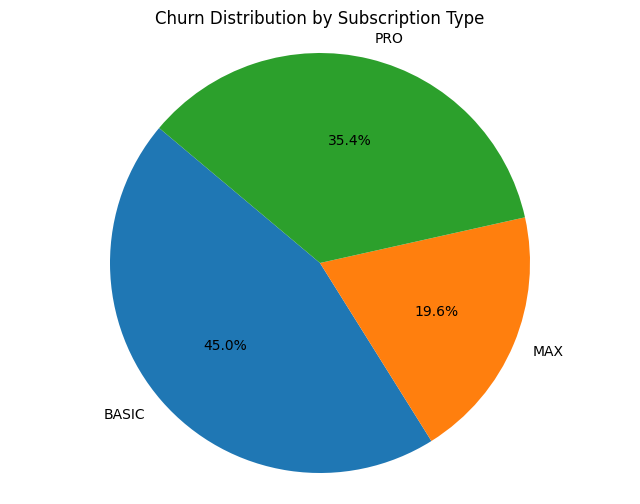

In [41]:
# Plot churn distribution by subscription type using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(subscription_churn, labels=subscription_churn.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution by Subscription Type')
plt.axis('equal') 
plt.savefig('churn_by_sub_type.png')  # Save the figure
plt.show()

In [42]:
# Calculate churn count by referral type
ref_type_churn= churn_df.groupby('referral_type').size()

# Calculate total churn count across all referral types
total_ref_type_churn= ref_type_churn.sum()

# Calculate churn rate by referral type
churn_rate_by_ref_type= (ref_type_churn/total_ref_type_churn) * 100
print('Churn rate by referral type:')
print(f'{churn_rate_by_ref_type}')

Churn rate by referral type:
referral_type
Bing               2.369021
Display            2.961276
Google Ads        32.710706
Organic Search    10.432802
Paid Search       10.615034
TV                 4.054670
Unknown            7.334852
facebook          29.521640
dtype: float64


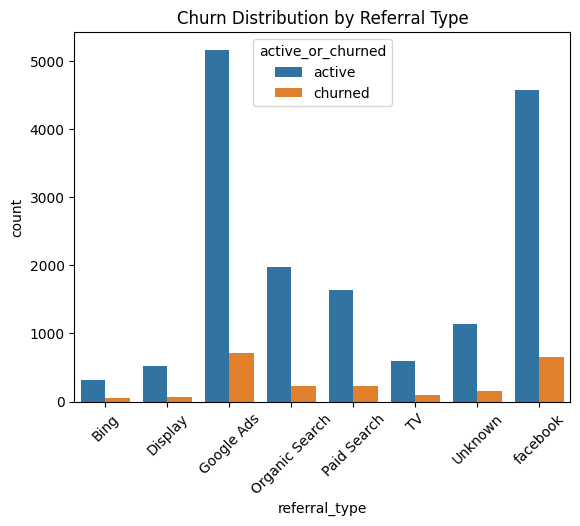

In [43]:
# Plot churn distribution by referral type
sns.countplot(x='referral_type', hue='active_or_churned', data=df)
plt.title('Churn Distribution by Referral Type')
plt.xticks(rotation=45)
plt.savefig('churn_by_referral.png')  # Save the figure
plt.show()

## 6. Conclusion

In this project, I performed a comprehensive analysis of the customer subscription and transaction data. I assessed and cleaned the data, explored subscription preferences and demographics, and analyzed churn rates. The visualizations provided valuable insights into customer behavior and subscription patterns, which can help in making informed business decisions and strategies.